Voici le code correspondant aux slides du cours "Fondamentaux du Machine Learning avec Python". Les exercices/TD sont disponibles dans des fichiers séparés.

Le package essentiel pour le Machine Learning en Python est [scikit-learn](https://scikit-learn.org/stable/index.html). Il comprend l'immense majorité des modèles de ML, dont ceux que nous allons voir lors de cette formation (modèles linéaires généralisés, CART et random forests).

Nous aurons également besoin des packages suivants :

*   Pour charger/manipuler les données : `numpy` et `pandas` ;
*   Pour afficher les résultats : `matplotlib`

Importons donc pour commencer ces packages :

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Un petit rappel sur le chargement des données avec pandas

Le package `pandas` permet de charger dans Python des données stockées sous forme tabulaire dans des fichiers texte (`.txt`, `.tab`, etc.), Excel ou CSV. La syntaxe est la suivante :

Pour un fichier texte ou CSV :

In [ ]:
df = pd.read_csv(
    'path-to-your-file', # chemin vers le fichier de données
    sep=',', # caractère séparant les données dans le fichier : ",", ";", "\t" etc.
    header=0, # 0 si l'entête contient les noms de colonne, "None" sinon
    usecols=['col1' ,'col2'], # colonnes à lire si besoin
    skiprows=0, # nombre de lignes à sauter avant de lire le fichier
    na_values='NaN' # string représentant les données manquantes
    )

Pour un fichier Excel :

In [ ]:
df = pd.read_excel(
    'path-to-your-file.xlsx',
    sheet_name='sheet1', # nom de la feuille Excel
    # autres arguments similaires à pd.read_csv()
)

# Modèles linéaires généralisés

## Régression linéaire simple

Le modèle correspondant dans `scikit-learn` est intitulé `LinearRegression`. On peut le charger comme suit :

In [ ]:
from sklearn.linear_model import LinearRegression

On aura également besoin des fonctions suivantes :

 * `train_test_split` permet d'automatiquement découper un jeu de données tabulaire en un dataset d'entraînement et de validation ;
 * `metrics` permet de calculer une grande variété de métriques de performance sans avoir à les recoder explicitement

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn import metrics

Chargeons pour commencer les données sur la hauteur et le diamètre des arbres :

In [ ]:
eucalypt = pd.read_csv("/content/sample_data/eucalyptus.txt", header=0, sep=";")

On affiche les données avec `matplotlib` sous forme de nuage de points :

Text(0, 0.5, 'Height (m)')

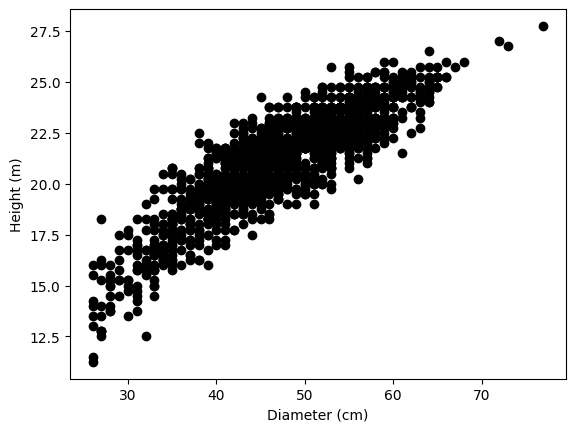

In [ ]:
plt.plot(eucalypt['circ'], eucalypt['ht'], "ko")
plt.xlabel('Diameter (cm)')
plt.ylabel('Height (m)')

In [ ]:
# On commence par diviser les données en entraînement et test.
X = eucalypt[['circ']]
y = eucalypt['ht']
# L'argument `test_size` permet de spéficier la fraction de données réservée au test.
# Ici, on prend 20%.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

On initialise et on ajuste le modèle comme suit :

In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

Les paramètres de la régression sont accessibles ici :

In [ ]:
slope = model.coef_
intercept = model.intercept_
print(slope, intercept)

[0.25545804] 9.098302856121743


Ce qui nous donne l'équation de la régression :

In [ ]:
x_range = np.linspace(X_train.min(), X_train.max(), 100)
y_range = slope * x_range + intercept

Enfin, on peut prédire sur les données de test comme ceci :

In [ ]:
y_pred = model.predict(X_test)

Visualisons les résultats :

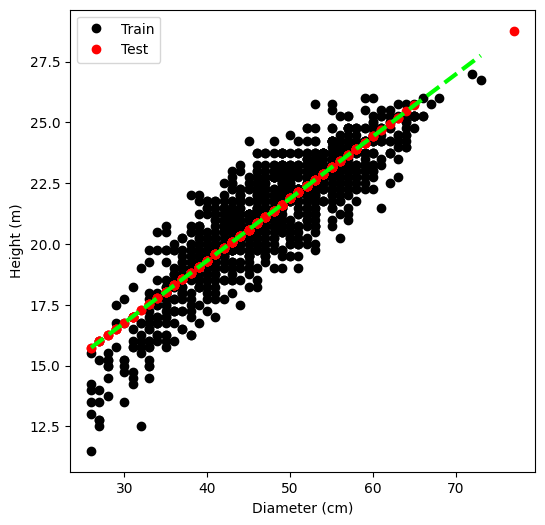

In [ ]:
fig = plt.figure(figsize=(6, 6))
# Données d'entraînement
plt.plot(X_train, y_train, "ko", label='Train')
# Données de test
plt.plot(X_test, y_pred, "ro", label='Test')
# Modèle linéaire ajusté
plt.plot(x_range, y_range, '--', color='lime', linewidth=3)
plt.xlabel('Diameter (cm)')
plt.ylabel('Height (m)')
plt.legend()
plt.show()

On peut également afficher quelques métriques de performance avec `metrics` :

In [ ]:
print(f'Mean Absolute Error (m): {metrics.mean_absolute_error(y_test, y_pred):.3f}')
print(f'Mean Squared Error ($m^2$): {metrics.mean_squared_error(y_test, y_pred):.3f}')
print(f'Root Mean Squared Error (m): {np.sqrt(metrics.mean_squared_error(y_test, y_pred)):.3f}')
print(f'$r^2$ : {metrics.r2_score(y_test, y_pred):.3f}')

Mean Absolute Error (m): 0.970
Mean Squared Error ($m^2$): 1.528
Root Mean Squared Error (m): 1.236
$r^2$ : 0.777


Pour la validation croisée, on peut utiliser la méthode `cross_val_score` de `scikit-learn` :

In [ ]:
from sklearn.model_selection import cross_val_score, LeaveOneOut

Il suffit de lui indiquer le nombre de blocs de validation croisée (ou `LeaveOneOut` pour des blocs de taille 1), et la méthode renvoie les différents scores de validation. Cela permet de mieux estimer l'erreur de prévision d'un modèle donné.

In [ ]:
scores = cross_val_score(LinearRegression(), X_train, y_train, cv=5)
print('Cross-validation scores: ', scores)

Cross-validation scores:  [0.75619825 0.77042285 0.76024869 0.74349048 0.78194169]


## Régression linéaire multivariée

Le modèle `scikit-learn` reste le même, `LinearRegression`. Simplement, nous allons passer plus de variables en entrée.

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

Chargeons le dataset `ozone.txt`.

In [ ]:
ozone = pd.read_csv("/content/sample_data/ozone.txt", header=0, sep=";")

Text(0.5, 0, 'O3')

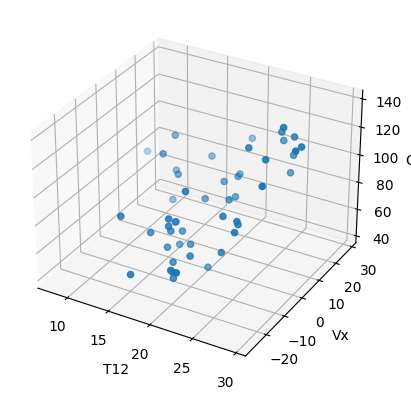

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(ozone["T12"], ozone["Vx"], ozone["O3"])
ax.set_xlabel('T12')
ax.set_ylabel('Vx')
ax.set_zlabel('O3')

Le modèle de prévision qui nous intéresse est le suivant :

$y_i = \beta_0 + \beta_1 X_i + \beta_2 Z_i + \varepsilon_i$
où
- $X_i$ est la $i^e$ observation de la variable explicative `T12` et
- $Z_i$ est la $i^e$ observation de la variable explicative `Vx`
- $X_i$ est la $i^e$ observation de la variable à expliquer `O3`
- $\varepsilon_i$ est la $i^e$ coordonnée du vecteur d'erreur
  $\varepsilon$
Traditionnellement on introduit toujours comme c'est le cas ici la constante (variable associée à $\beta_0$).

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(ozone[['T12', 'Vx', 'Ne12']], ozone.O3, test_size=0.2, random_state=0)

model_mult = LinearRegression()
model_mult.fit(X_train, y_train)

LinearRegression()

On affiche les paramètres estimés :

In [ ]:
coeffs = model_mult.coef_
intercept = model_mult.intercept_
print(coeffs, intercept)

[ 2.23745851  0.45597739 -4.53717408] 62.665189036839806


Affichons les prédictions pour les données de test :

In [ ]:
y_pred = model_mult.predict(X_test)

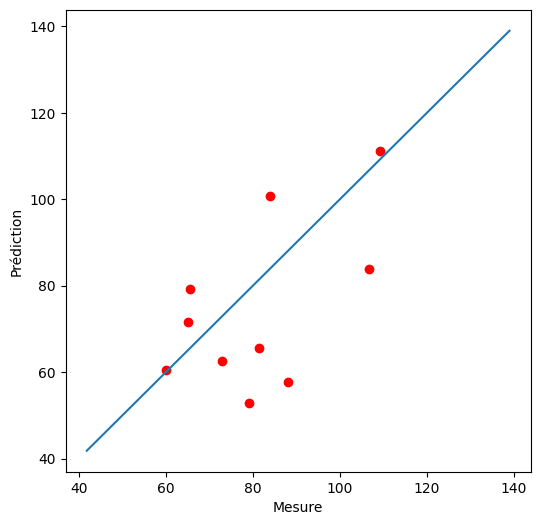

In [ ]:
fig = plt.figure(figsize=(6, 6))
plt.plot(y_test, y_pred, "ro")
plt.xlabel('Mesure')
plt.ylabel('Prédiction')
plt.plot([np.min(ozone["O3"]), np.max(ozone["O3"])], [np.min(ozone["O3"]), np.max(ozone["O3"])])
plt.show()

Et on calcule nos métriques de performance :

In [ ]:
print(f'Mean Absolute Error: {metrics.mean_absolute_error(y_test, y_pred):.3f}')
print(f'Mean Squared Error: {metrics.mean_squared_error(y_test, y_pred):.3f}')
print(f'Root Mean Squared Error: {np.sqrt(metrics.mean_squared_error(y_test, y_pred)):.3f}')
print(f'$r^2$ : {metrics.r2_score(y_test, y_pred):.3f}') # pas assez de points pour calculer un r^2 très parlant...

Mean Absolute Error: 14.488
Mean Squared Error: 299.559
Root Mean Squared Error: 17.308
$r^2$ : -0.193


## Régression logistique

On importe le jeu de données `artere.txt`.

In [ ]:
data = pd.read_csv("/content/sample_data/artere.txt", header=0, sep=" ")
data.head()

,age,agrp,chd
0,20,1,0
1,23,1,0
2,24,1,0
3,25,1,0
4,25,1,1


Le dataset contient trois colonnes. Celle du milieu n'est pas importante ici. On va tenter de modéliser la probabilité pour un patient soit malade (`chd`) en fonction de son âge.

In [ ]:
df = data.copy()
df = df.sort_values('age')
df['group'] = pd.qcut(df['age'], 10, labels=False)

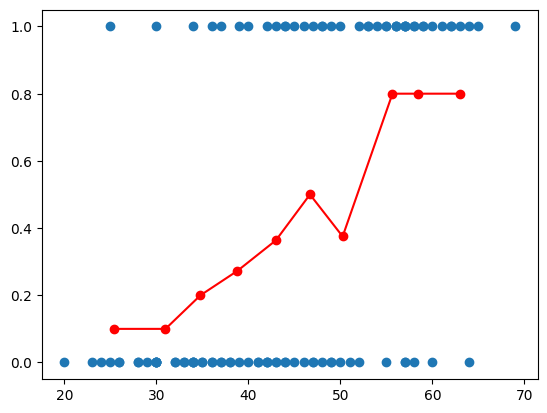

In [ ]:
new_df = df.groupby('group').aggregate({'age': 'mean', 'chd': 'mean'})

plt.scatter(df.age, df.chd)
plt.plot(new_df['age'], new_df['chd'], '-o', color='red')
plt.show()

Le modèle qu'il nous faut importer depuis `scikit-learn` est `LogisticRegression`.

In [ ]:
from sklearn.linear_model import LogisticRegression

On ajuste le modèle et on calcule les prédictions (probabilités).

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(data[['age']], data['chd'], test_size=0.2, random_state=0)

In [ ]:
reg = LogisticRegression(None, max_iter=1000)
reg.fit(X_train, y_train)
y_pred = reg.predict_proba(X_test)

L'argument `max_iter` indique le nombre maximal d'itérations du solveur numérique utilisé pour optimiser la fonction de coût (vraisemblance).

Par défaut, `y_pred` retourne les couples (1-p, p), où p est la probabilité que Y=1.

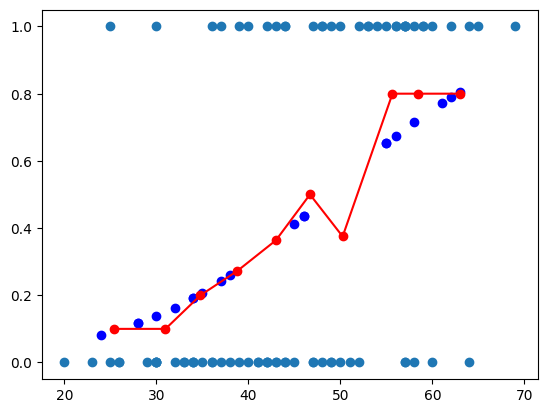

In [ ]:
plt.scatter(X_train.age, y_train)
plt.plot(new_df['age'], new_df['chd'], '-o', color='red')
plt.scatter(X_test.age, y_pred[:, 1], color='blue')
plt.show()

# Régression régularisée

## Régression ridge

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics

Regardons à nouveau le jeu de données d'ozone.

In [ ]:
ozone = pd.read_csv("/content/sample_data/ozone.txt", header=0, sep=";")
ozone.head()

,Date,O3,T12,T15,Ne12,N12,S12,E12,W12,Vx,O3v,nebulosite,vent
0,19960422,63.6,13.4,15.0,7,0,0,3,0,9.35,95.6,NUAGE,EST
1,19960429,89.6,15.0,15.7,4,3,0,0,0,5.40,100.2,SOLEIL,NORD
2,19960506,79.0,7.9,10.1,8,0,0,7,0,19.30,105.6,NUAGE,EST
3,19960514,81.2,13.1,11.7,7,7,0,0,0,12.60,95.2,NUAGE,NORD
4,19960521,88.0,14.1,16.0,6,0,0,0,6,-20.30,82.8,NUAGE,OUEST


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(ozone[['T12', 'T15', 'Ne12', 'Vx', 'O3v']], ozone.O3, test_size=0.2, random_state=0)

Pour implémenter ridge, la première chose à faire, c'est de normaliser les différentes variables explicatives pour qu'elles soient toutes sur du même ordre de grandeur. `scikit-learn` a la fonction qu'il faut.

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

On va considérer les variables explicatives suivantes : `T12`, `T15`, `Ne12`, `Vx` et `O3v`.

Commençons par recoder le modèle de régression linéaire multivariée sans régularisation :

In [ ]:
model_base = LinearRegression().fit(X_train_scaled, y_train)
y_pred = model_base.predict(X_test_scaled)

Ensuite, on choisit `lambda` par validation croisée. Là encore, `scikit-learn` a la fonction déjà codée !

In [ ]:
from sklearn.linear_model import RidgeCV, Ridge

On définit la grille de $\lambda$ qu'on veut explorer et on utilise `RidgeCV` pour déterminer le $\lambda$ optimal.

Attention dans `scikitlearn` le paramètre $\lambda$ de la ridge (et lasso, et elastic-net) s&rsquo;appelle $\alpha$.

In [ ]:
n_lambdas = 100
lambda_grid = np.logspace(0.01, 2, n_lambdas)
ridge = RidgeCV(alphas=lambda_grid, cv=10, fit_intercept=True).fit(X_train_scaled, y_train)
# Le paramètre "cv=10" indique ici une validation croisée à 10 blocs.

In [ ]:
lambda_opt = ridge.alpha_
print(lambda_opt)
print(np.min(lambda_grid), np.max(lambda_grid))

4.500205263002828
1.023292992280754 100.0


In [ ]:
model_ridge = ridge.fit(X_train_scaled, y_train)
y_pred_ridge = model_ridge.predict(X_test_scaled)

On peut déjà regarder la RMSE des deux modèles :

In [ ]:
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred_ridge)))

15.82528604757789
15.549426065388245


Les coefficients de la régression sont accessibles avec :

In [ ]:
print(model_base.coef_)
print(model_ridge.coef_)

[ 4.75877915  3.32420055 -9.4358371   3.89499115  6.99414703]
[ 4.09388072  4.17911698 -8.49238713  3.96663175  6.62621472]


Pas de différence majeure avec ridge, mais la performance est légèrement meilleure.

Un inconvénient, c'est qu'il faut normaliser les coefficients avant d'appliquer le modèle, ce qui en pratique pour de nouvelles valeurs peut être lourd. Heureusement, `scikit-learn` propose une classe `Pipeline` pour gérer tout ça.

In [ ]:
from sklearn.pipeline import Pipeline

In [ ]:
# On commence par créer une instance de StandardScaler
cr = StandardScaler()
# Puis une instance de régression ridge
model_ridge = Ridge(alpha=lambda_opt, fit_intercept=True)
# On crée la pipeline
ridge_pipeline = Pipeline(steps=[("cr", cr) , ("ridge",  model_ridge)])
# On ajuste tout cela aux données d'entraînement non normalisées
ridge_pipeline.fit(X_train, y_train)

Pipeline(steps=[('cr', StandardScaler()),
                ('ridge', Ridge(alpha=4.500205263002828))])

On peut accéder au modèle ajusté et aux prédictions comme suit :

In [ ]:
print(ridge_pipeline.named_steps["ridge"].coef_)
y_pred_pipeline = ridge_pipeline.predict(X_test)
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred_pipeline)))

[ 4.09388072  4.17911698 -8.49238713  3.96663175  6.62621472]
15.549426065388245


## LASSO et ElasticNet

Le code est exactement le même que celui de ridge, mais avec les fonctions suivantes :

In [ ]:
from sklearn.linear_model import LassoCV, ElasticNetCV, Lasso, ElasticNet

Profitons-en pour voir une autre fonction utile de `scikit-learn` : `GridSearchCV`.

In [ ]:
from sklearn.model_selection import GridSearchCV

`GridSearchCV` est la fonction générique de `scikit-learn` pour optimiser des hyperparamètres de modèles par validation croisée. Ses avantages sont qu'elle s'applique à une vaste catégorie de modèles, et permet de gérer de multiples hyperparamètres simultanément. Il est également possible de faire les calculs en parallèle pour gagner du temps.

Pour un modèle LASSO, cela donne :

In [ ]:
lasso = Lasso()
lambda_grid = {'alpha': np.logspace(-4, 0, 200)}
grid_search = GridSearchCV(
    estimator = lasso,
    param_grid = lambda_grid,
    scoring = 'neg_mean_absolute_error',
    cv = 10,
    return_train_score=True,
    verbose = 1)
# "scoring" permet de spéficier une métrique de performance différente
# de la fonction de coût utilisée pour entraîner. La liste complète est
# disponible via :
# '''
# from sklearn.metrics import get_scorer_names
# get_scorer_names()
# '''

In [ ]:
grid_search.fit(X_train_scaled, y_train)

Fitting 10 folds for each of 200 candidates, totalling 2000 fits


GridSearchCV(cv=10, estimator=Lasso(),
             param_grid={'alpha': array([1.00000000e-04, 1.04737090e-04, 1.09698580e-04, 1.14895100e-04,
       1.20337784e-04, 1.26038293e-04, 1.32008840e-04, 1.38262217e-04,
       1.44811823e-04, 1.51671689e-04, 1.58856513e-04, 1.66381689e-04,
       1.74263339e-04, 1.82518349e-04, 1.91164408e-04, 2.00220037e-04,
       2.09704640e-04, 2.19638537e-04, 2.30043012e-04, 2...
       4.15040476e-01, 4.34701316e-01, 4.55293507e-01, 4.76861170e-01,
       4.99450512e-01, 5.23109931e-01, 5.47890118e-01, 5.73844165e-01,
       6.01027678e-01, 6.29498899e-01, 6.59318827e-01, 6.90551352e-01,
       7.23263390e-01, 7.57525026e-01, 7.93409667e-01, 8.30994195e-01,
       8.70359136e-01, 9.11588830e-01, 9.54771611e-01, 1.00000000e+00])},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

Les résultats de la validation croisée sont accessibles dans `model_cv.results_`.

In [ ]:
cv_results = pd.DataFrame(grid_search.cv_results_)
# cv_results.head()

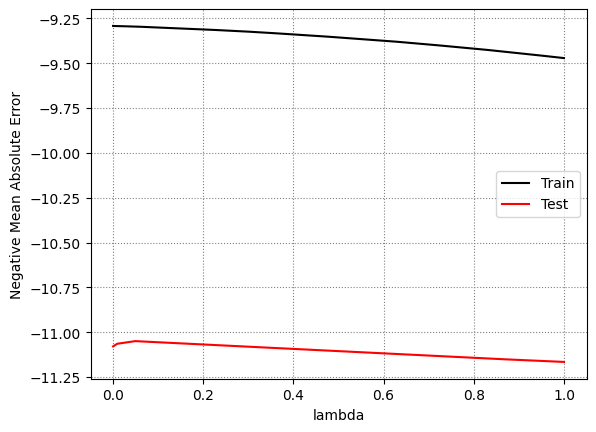

In [ ]:
plt.plot(cv_results.param_alpha, cv_results.mean_train_score, 'k-', label='Train')
plt.plot(cv_results.param_alpha, cv_results.mean_test_score, 'r-', label='Validation')
plt.xlabel('lambda')
plt.ylabel('Negative Mean Absolute Error')
plt.grid(linestyle=':', color='gray')
plt.legend()
plt.show()

On peut obtenir le meilleur modèle avec la méthode `best_estimator_` et les paramètres optimaux avec la méthode `best_params_` :

In [ ]:
print(grid_search.best_params_)
lasso_best = grid_search.best_estimator_
y_pred_lasso = lasso_best.predict(X_test_scaled)

{'alpha': 0.049370478528390035}


In [ ]:
print(model_base.coef_)
print(model_ridge.coef_)
print(lasso_best.coef_)

[ 4.75877915  3.32420055 -9.4358371   3.89499115  6.99414703]
[ 4.09388072  4.17911698 -8.49238713  3.96663175  6.62621472]
[ 4.6949831   3.35781472 -9.42575479  3.8588498   6.97814118]


In [ ]:
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred_ridge)))
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred_lasso)))

15.82528604757789
15.549426065388245
15.78227863429438


# Arbres de décision et random forests

Les fonctions de `scikit-learn` sont les suivantes :

 * `DecisionTreeRegressor` pour un modèle CART de régression ;
 * `DecisionTreeClassifier` pour un modèle CART de classification ;
 * `RandomForestRegressor` pour une random forest de régression ;
 * `RandomForestRegressor` pour une random forest de classification ;

In [ ]:
# Commençons par tous les importer
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor

On considère un exemple de classification sur le jeu de données `iris` disponible via `scikit-learn`. Dans le TD, nous nous intéresserons à la régression.

In [ ]:
from sklearn.datasets import load_iris
iris = load_iris()
X = iris.data
y = iris.target

Le but est de prédire l'espèce d'iris (`y`) en fonction de différentes variables explicatives (taille de sépale, etc.) Plus d'informations sont disponibles [ici](https://www.kaggle.com/datasets/uciml/iris).

Commençons par un simple arbre de décision. Les paramètres sont les suivants :

 * `min_samples_split` : le nombre minimum d'observations dans un noeud pour envisager une coupe.
 * `min_samples_leaf` : le nombre minimal de données qui doivent être présentes dans un noeud terminal.
 * `max_depth` : La profondeur maximale d'un arbre.
 * `max_features` : le nombre de feature à considérer lorsqu'on cherche le meilleur split.

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [ ]:
tree = DecisionTreeClassifier(max_depth=3)
tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3)

In [ ]:
y_pred = tree.predict(X_test)

On va utiliser une fonction pré-codée de `scikit-learn` pour calculer la performance de la classification :

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))
# Les scores sont d'abord affichés pour chaque classe prise séparément,
# puis moyennés sur toutes les classes.

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       0.93      1.00      0.96        13
           2       1.00      0.83      0.91         6

    accuracy                           0.97        30
   macro avg       0.98      0.94      0.96        30
weighted avg       0.97      0.97      0.97        30



On peut même afficher l'arbre entraîné comme suit :

In [ ]:
from sklearn.tree import plot_tree

plt.figure(figsize=(8, 5))
plot_tree(tree, filled=True, rounded=True)
# si X_train était un dataframe avec noms de colonnes,
# on pourrait spécifier "feature_names=X_train.columns"
plt.show()

Essayons à présent une random forest. La fonction prend les mêmes paramètres que `RandomTreeClassifier` avec en plus le nombre d'arbres à entraîner.

In [ ]:
clf = RandomForestClassifier(n_estimators=100, max_depth=3)
scores = cross_val_score(clf, X_train, y_train, cv=5, scoring='accuracy')
print('Scores: ', scores)
print(f'Moyenne : {scores.mean():.3f}')

Moyenne : 0.950
